# 3D Laplace Equation

## Laplace Equation
Laplace Equation은 비압축성, 비회전류 유동에서 정상상태일 때 Velocity Potential 또는 Streamfunction의 해이다.

$$
\nabla^2 u = 0.
$$

간단한 예제로 Heat Conduction에 의해 Steady State에 도달하는 경우를 생각하자

예를 들면, 윗면에 온도만 300도이고 나머지 면의 온도가 100도인 경우 최종적으로 2차원 공간 내 온도 분포는 Laplace Equation으로 구할 수 있다.

$[0,1]^3$ 공간에 대해 수식으로 표현하면 다음과 같다.

$$
-k (T_{xx} + T_{yy} + T_{zz}) = 0\\
T(x, 1, z) = 300, T(x, 0, z) = 100, 상하\\
T(x, y, 0) = T(x, y, 1) = 100, 좌우\\
T(0, y, z) = T(1, y, z) = 100, 전후\\
$$

편의상 $k=1$ 로 생각한다.

### Finite Difference Method
계산 영역을 x, y, z 각 방향별로 균일하게 나누어서 생각하자.

이 경우 3차원 Array는 각 격자점의 해와 부합한다.

각 방향별 편미분을 2차 정확도 Central Difference로 표현하면 다음과 같다.

$$
\frac {T_{i+1,j,k} -2 T_{i,j,k} +  T_{i-1,j,k}}{\Delta x^2}
+
\frac {T_{i,j+1,k}^n -2 T_{i,j,k}^n +  T_{i,j-1,k}^n}{\Delta y^2}
+
\frac {T_{i,j,k+1}^n -2 T_{i,j,k}^n +  T_{i,j,k-1}^n}{\Delta z^2}
=0
$$

$\Delta x = \Delta y = \Delta z = h$ 인 경우 다음과 같이 정리된다.

$$
T_{i+1,j,k} + T_{i,j+1,k} + T_{i, j, k+1} - 6 T_{i,j,k} + T_{i,j-1,k} + T_{i-1,j,k} + T_{i,j,k-1}
=0
$$

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

#import plotly.graph_objects as go

import numpy as np
import math
from numpy import linalg

import subprocess
import time

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Iterative Methods

### 개념
매우 큰 행렬 System $Ax=b$ 를 반복해서 푸는 방법이다.

기본 개념은 다음과 같다.
- $A = A_1 - A_2$
   - $A_1$ 은 역행렬을 쉽게 구해지는 형태이다.
   
$$
A_1 x = A_2 x + b
$$
   
- 반복되는 해를 $x^{(k)}$ 하고 이를 적용한다.

$$
A_1 x^{(k+1)} = A_2 x^{(k)}+ b
$$

- $x^{(k)} \rightarrow x$ 이면 오차 $e^{(k)} = x^{(k+1)} - x^{(k)} \rightarrow 0$ 이다. 즉 오차가 $e^{(k)}$ 감소할 때 까지 반복한다.

   - 모든 경우에 오차가 감소하지 않는다. $A_1^{-1} A_2$ 의 Eigenvalue가 모두 1 보다 작아야 한다.
   
   
### Point Jacobi Method
이 방법은 $A_1 = D$ 로 한 경우이다.

Laplace 문제에 적용하면 다음과 같이 표현할 수 있다.

$$
T_{i, j, k}^{(n+1)} = \frac{1}{6} \left (
T_{i+1,j,k}^{(n)} + T_{i,j+1,k}^{(n)}+ T_{i,j,k+1}^{(n)} + T_{i,j-1,k}^{(n)} + T_{i-1,j,k}^{(n)} + T_{i,j,k-1}^{(n)}
\right )
$$

In [3]:
#subprocess.run(["python", "3D_serial.py"])
ti_serial = np.load("ti_serial.npy")
time_serial = np.load("time_serial.npy")

In [4]:
#subprocess.run(["python", "3D_numba.py"])
ti_numba = np.load("ti_numba.npy")
time_numba = np.load("time_numba.npy")

In [5]:
#subprocess.run(["python", "3D_pycuda.py"])
ti_pycuda = np.load("ti_pycuda.npy")
time_pycuda = np.load("time_pycuda.npy")


In [6]:
#subprocess.run(["python", "3D_numba_nonorm.py"])
ti_numba_nonorm = np.load("ti_numba_nonorm.npy")
time_numba_nonorm = np.load("time_numba_nonorm.npy")

In [7]:
print(time_numba)
print(time_pycuda)
print(time_serial)
print(time_numba_nonorm)

[ 0.48154646  0.73644131  1.04309877  1.40570796  2.00280393  2.52581871
  3.13200148  3.87826421  4.78482319  5.74188175  7.06008168  8.74307069
 10.57448946]
[ 0.12033525  0.23921174  0.51319516  0.90559764  1.52983302  2.40459403
  3.95358386  5.9186237   8.65638847 12.41157458 17.8680371  24.81117646
 33.93626459]
[4.43526745e-01 1.81345534e+00 5.07292366e+00 1.06253979e+01
 3.08520327e+01 5.64795806e+01 8.61711557e+01 1.35831630e+02
 2.13453224e+02 3.29239213e+02 4.79965146e+02 6.79143447e+02
 9.47227309e+02]
[ 0.20685016  0.39560993  0.71732646  1.18061264  1.832496    2.82731996
  4.28391367  6.36433135  9.21841363 13.19278721 18.69118313 25.64224998
 34.63988464]


In [8]:
if linalg.norm(ti_numba-ti_serial) < 1e-4 :
    print("Solution Converged")

if linalg.norm(ti_numba_nonorm-ti_numba) < 1e-4 :
    print("Solution Converged")

Solution Converged
Solution Converged


In [9]:
if linalg.norm(ti_pycuda-ti_serial) < 1e-4 :
    print("Solution Converged")
else:
    print(linalg.norm(ti_pycuda-ti_serial))

np.allclose(ti_pycuda, ti_serial)

Solution Converged


True

이거 왜 수렴 안하지? 평균적으로 격자 당 0.004정도의 오차를 보이는거긴한데..

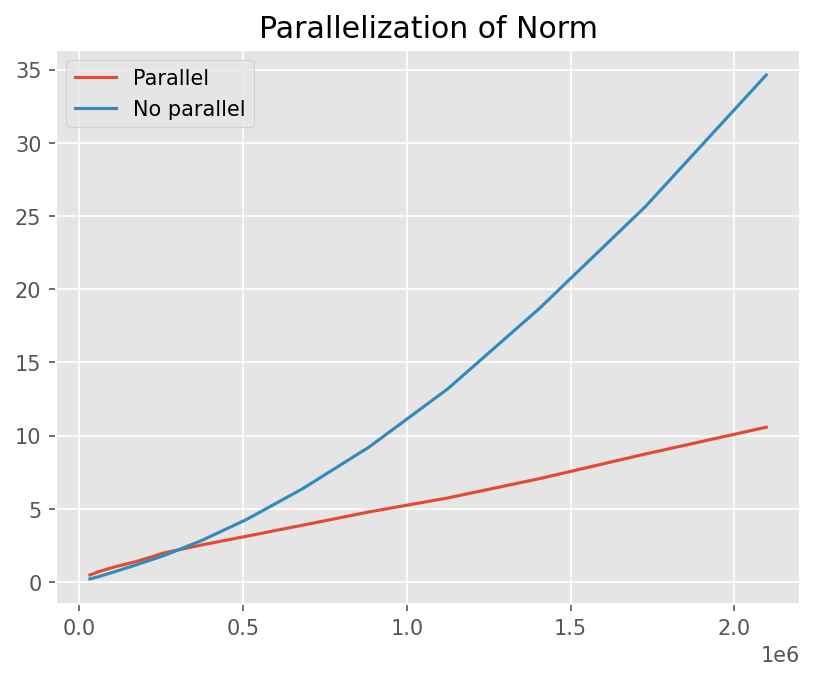

In [17]:

ns = (np.arange(30,127,8)+2)**3
plt.title("Parallelization of Norm")
plt.plot(ns, time_numba, label = "Parallel")
plt.plot(ns, time_numba_nonorm, label = "No parallel")
plt.grid(True)
plt.legend()
plt.show()

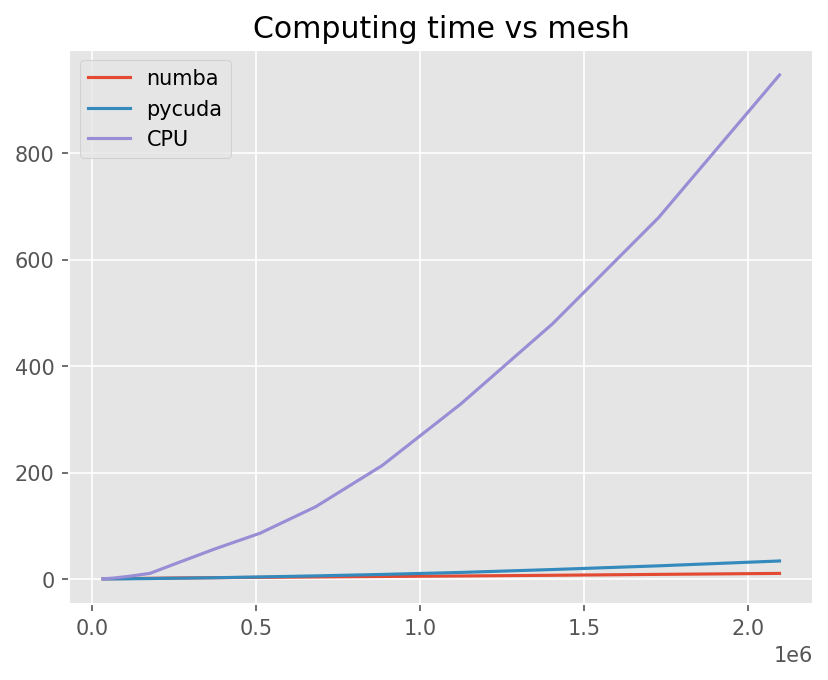

In [15]:
ns = (np.arange(30,127,8)+2)**3   # 실제 계산된 배열은 n+2^3이기 때문
plt.title("Computing time vs mesh")
plt.plot(ns, time_numba, label = "numba")
plt.plot(ns, time_pycuda, label = "pycuda")
plt.plot(ns, time_serial, label = "CPU")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
subprocess.run(["python", "plot3D.py"])
# 잉 이거 안되네?

CompletedProcess(args=['python', 'plot3D.py'], returncode=1)

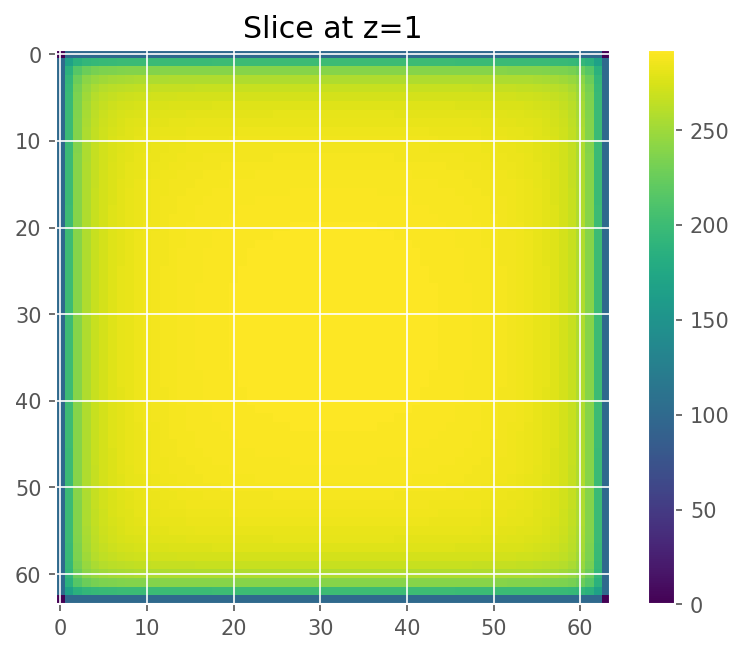

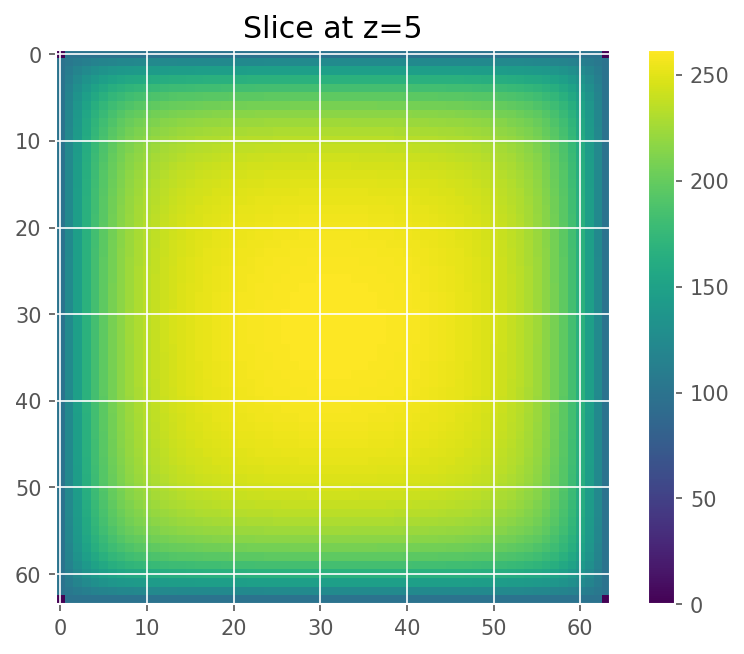

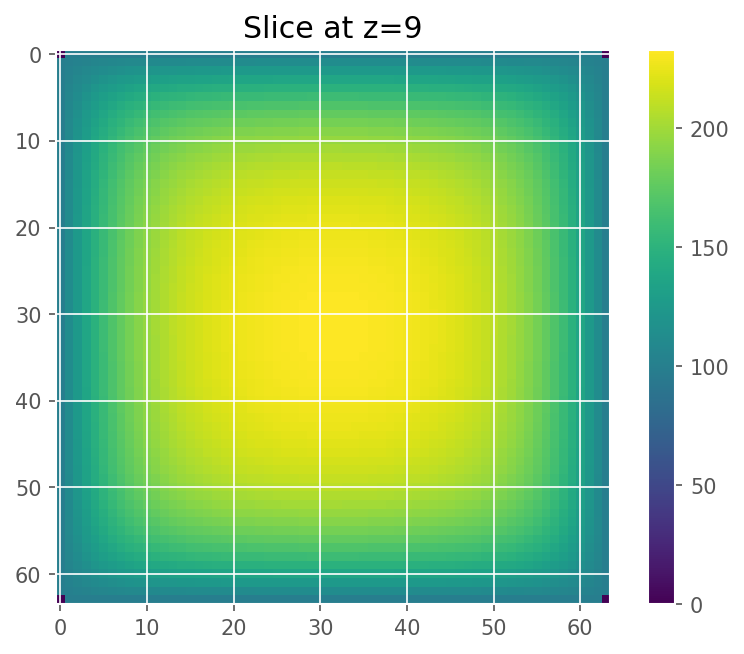

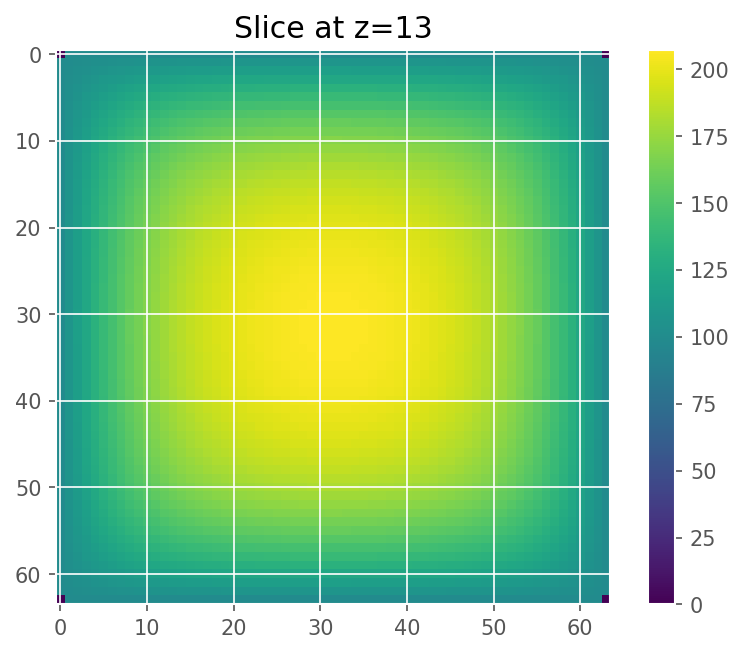

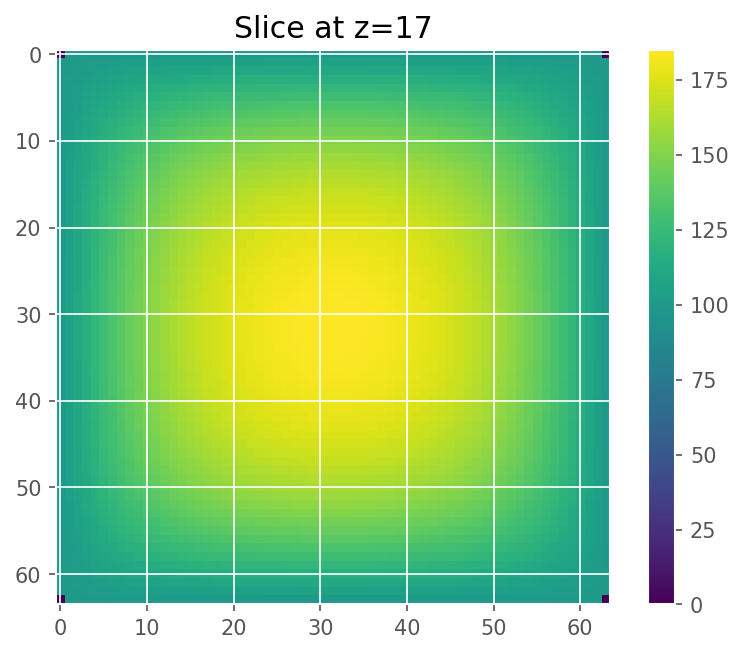

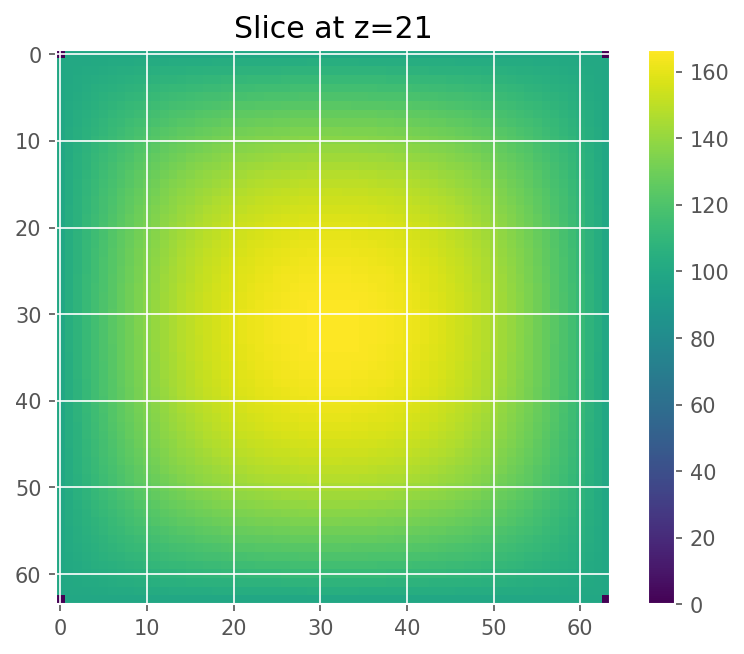

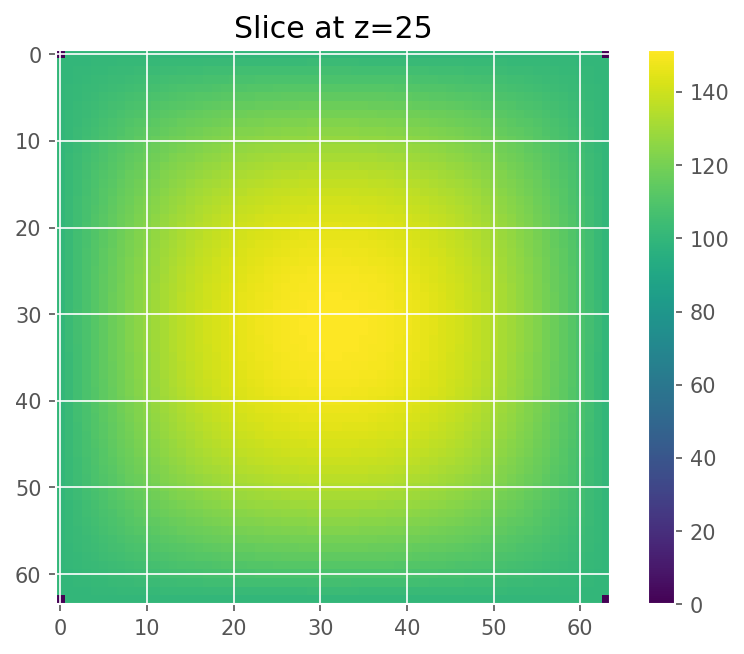

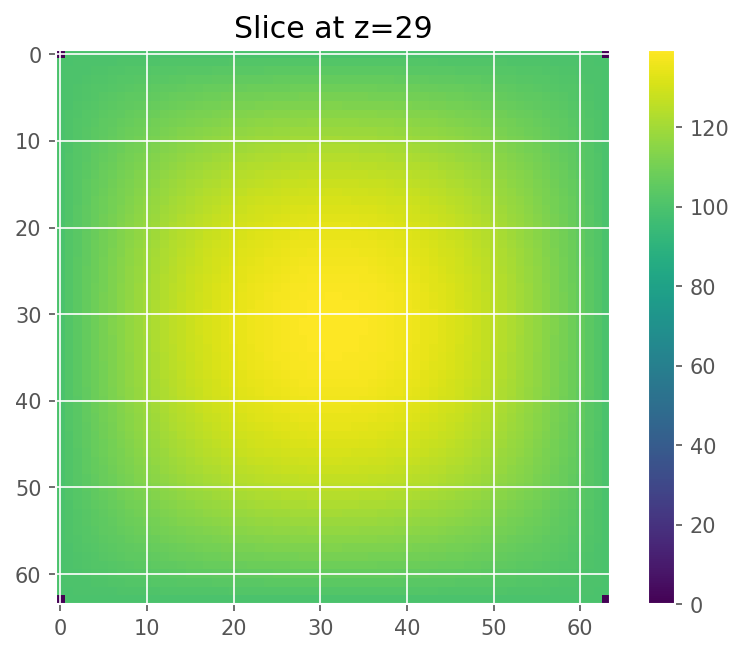

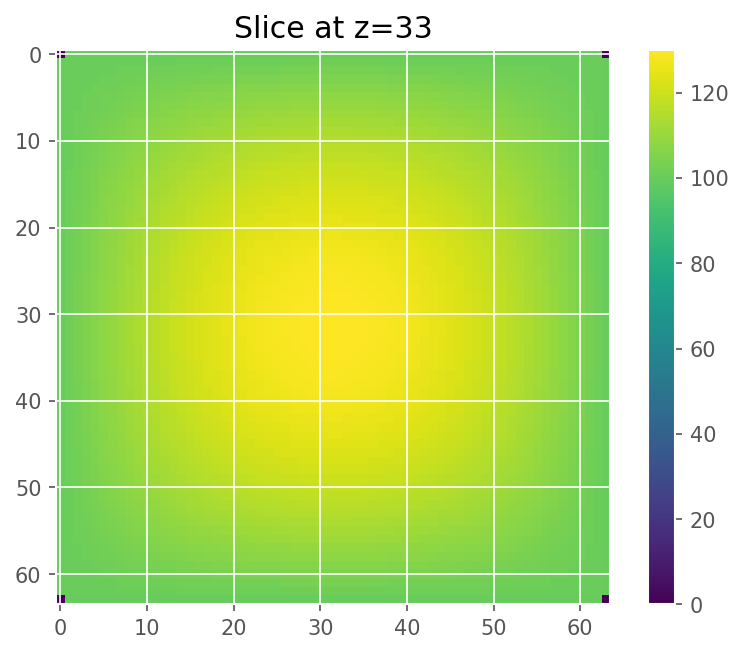

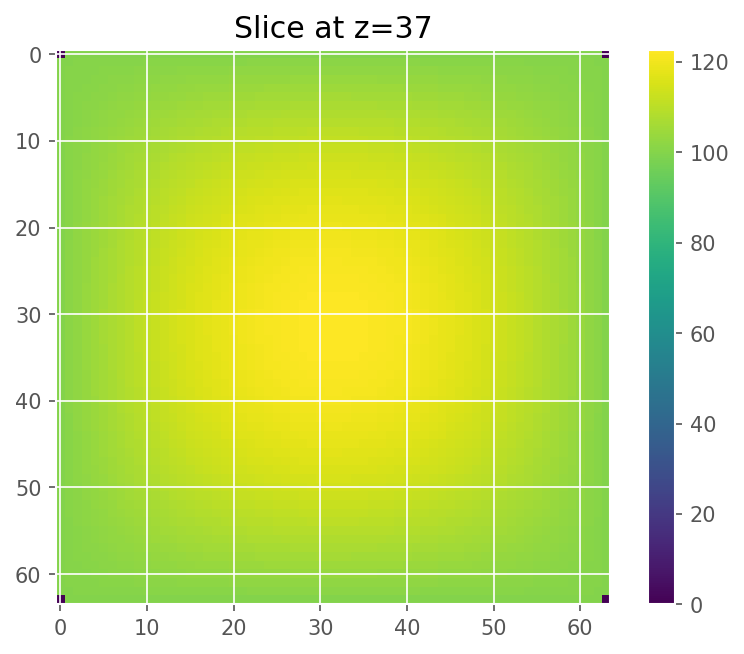

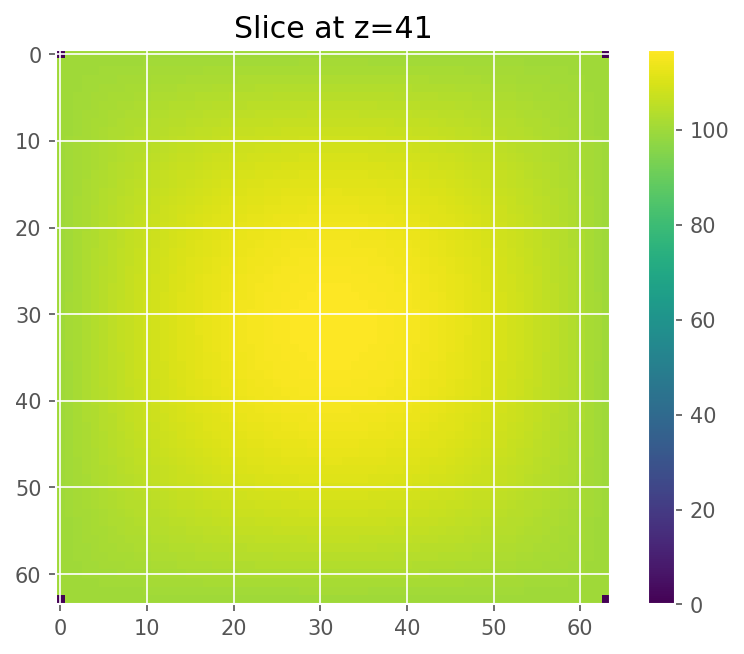

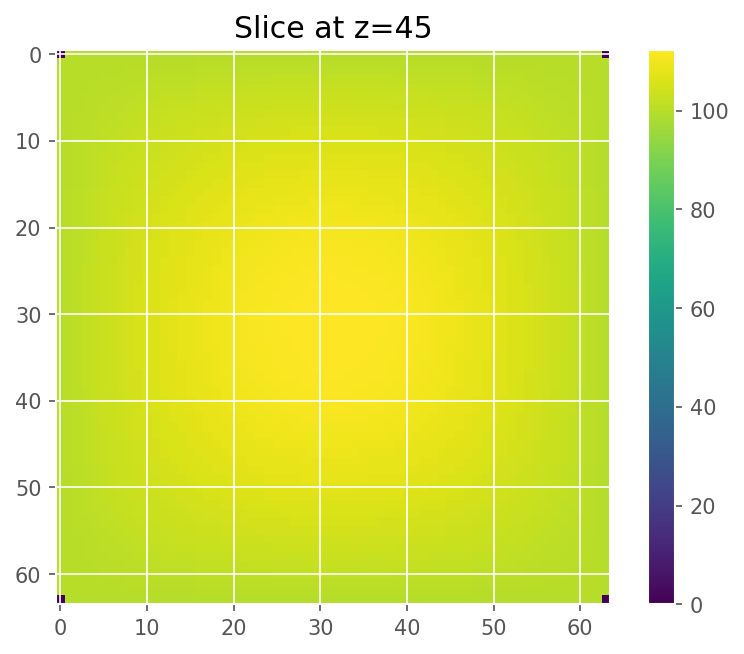

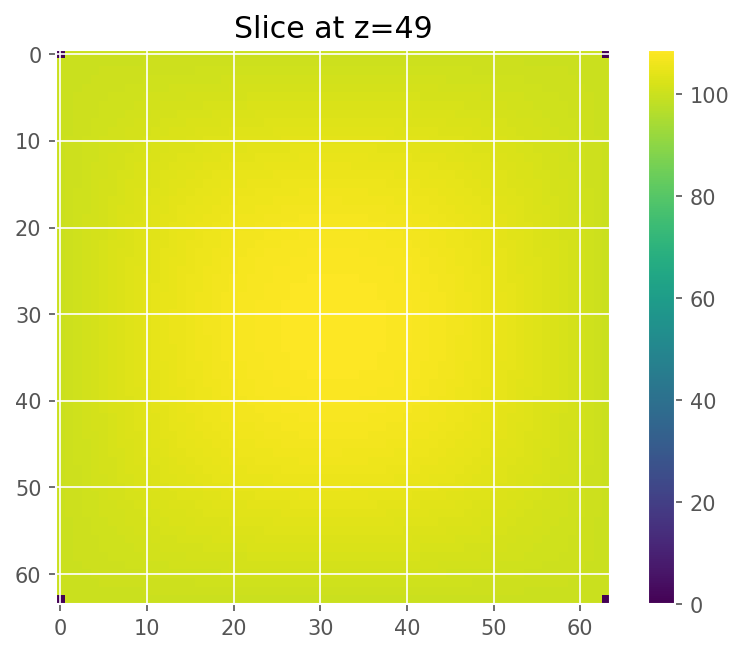

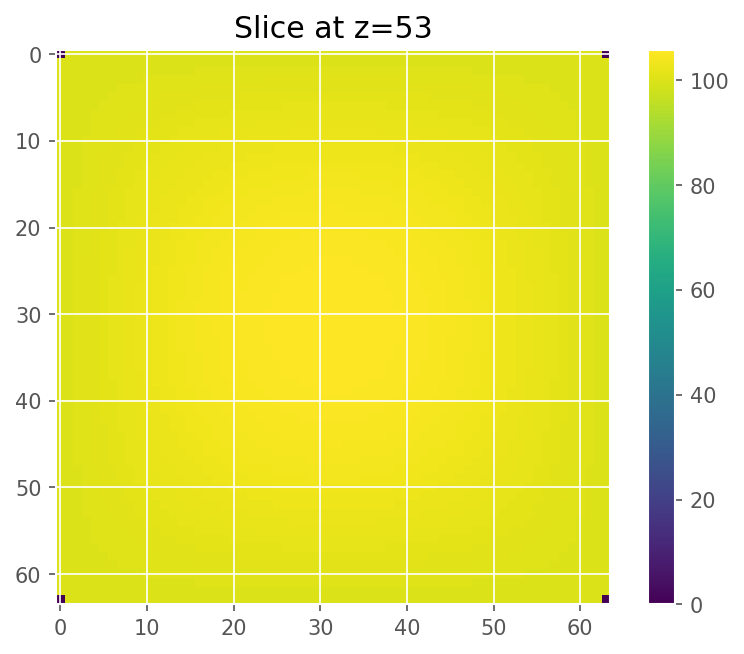

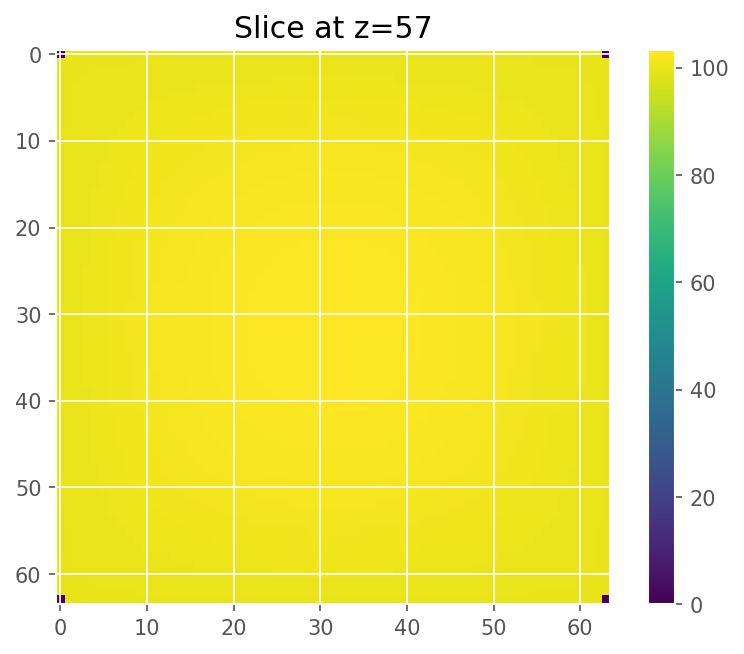

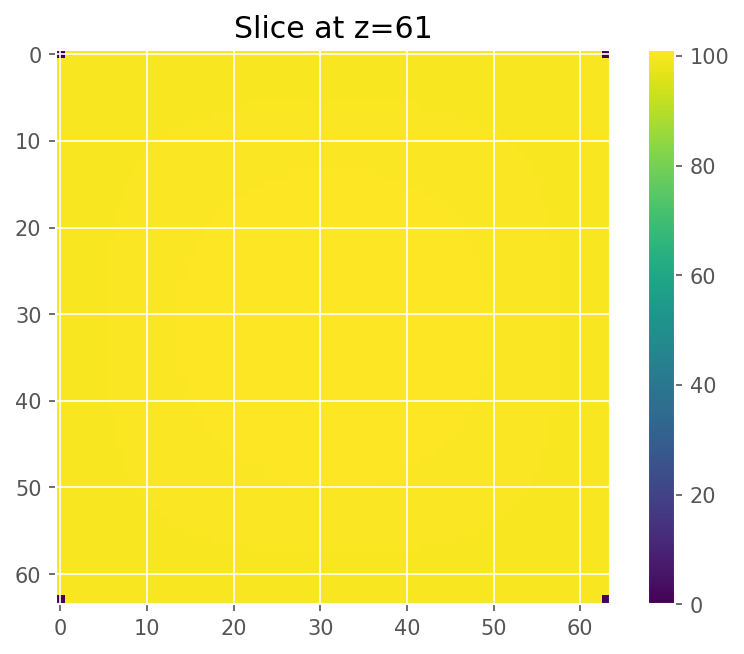

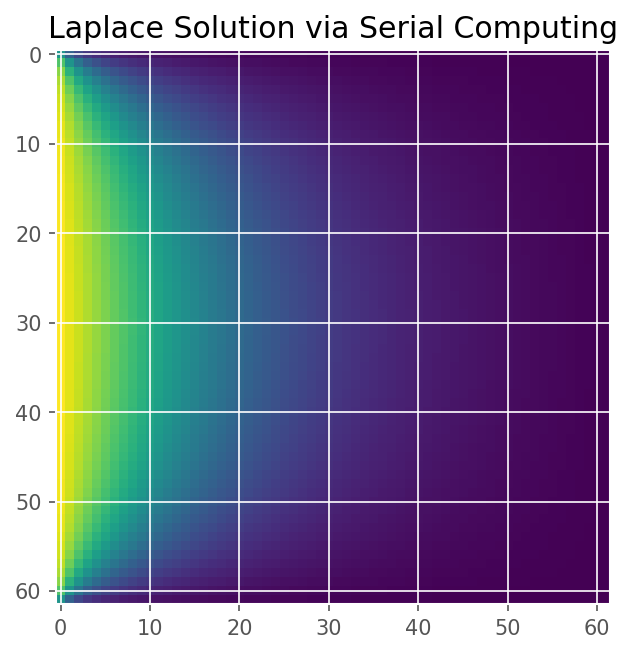

In [ ]:
# 라플라스 해 플롯 64*64*64 배열
for z in range(1, 64, 4):
    plt.imshow(ti_serial[:, :, z])
    plt.title(f'Slice at z={z}')
    plt.colorbar()
    plt.show()

# Plot contour
plt.imshow(ti_serial[31, 1:-1, 1:-1])
plt.title("Laplace Solution via Serial Computing")
plt.show()

## Speed-Up, Efficiency, T/P